### Real Images

The MADBase is modified Arabic handwritten digits database contains 60,000 training images, and 10,000 test images. MADBase were written by 700 writers. Each writer wrote each digit (from 0 -9) ten times. To ensure including different writing styles, the database was gathered from different institutions: Colleges of Engineering and Law, School of Medicine, the Open University (whose students span a wide range of ages), a high school, and a governmental institution.

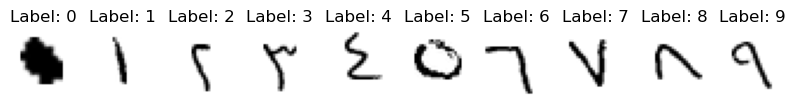

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def read_labels(file_path):
    labels = []
    with open(file_path, 'r') as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            labels.append(int(row[0]))
    return labels

def read_images(file_path):
    images = []
    with open(file_path, 'r') as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            img = [int(pixel) for pixel in row]
            img = np.array(img).reshape(28, 28)
            images.append(img)
    return images

def find_images_by_label(labels, images, target_labels):
    found_images = {}
    for target_label in target_labels:
        for label, img in zip(labels, images):
            if label == target_label:
                found_images[target_label] = img
                break
    return found_images

def display_images(images, save_path=None):
    fig, ax = plt.subplots(1, len(images), figsize=(10, 50))
    for idx, (label, img) in enumerate(images.items()):
        img = 255 - img  # Invert the colors
        img = np.rot90(img)
        img = np.flipud(img)  # Flip Vertically
        ax[idx].imshow(img, cmap='gray')
        ax[idx].set_title(f"Label: {label}")
        ax[idx].axis("off")
    if save_path is not None:
        plt.savefig(save_path)
    else:
        plt.show()


label_file_path = "/home/siu853655961/image_generation/data/trainLabel.csv"
image_file_path = "/home/siu853655961/image_generation/data/trainImages.csv"

labels = read_labels(label_file_path)
images = read_images(image_file_path)
target_labels = list(range(10))

found_images = find_images_by_label(labels, images, target_labels)
display_images(found_images, save_path="real_images.png")



### Generative Models

Variational Autoencoders (VAEs) and Generative Adversarial Networks (GANs) are two popular generative models used for tasks such as image generation, representation learning, and unsupervised learning. They have different approaches to learning data distributions, which result in different strengths and weaknesses.

### VAEs

* VAEs are built on a probabilistic framework and learn an explicit probabilistic representation of the data. They optimize a lower bound on the data likelihood.
* They consist of an encoder and a decoder. The encoder maps the input data to a latent space, while the decoder reconstructs the input data from the latent representation.
* VAEs are trained using backpropagation and can be optimized with standard gradient-based methods, such as stochastic gradient descent or Adam.
* The generated samples from VAEs are generally smoother and have a higher likelihood of being close to the training data distribution, but they can sometimes be blurry or overly smooth.

### GANs:

* GANs are based on an adversarial framework where two neural networks, the generator and the discriminator, are trained simultaneously in a zero-sum game.
* The generator tries to produce realistic samples, while the discriminator tries to distinguish between real and generated samples. They are trained iteratively to improve each other's performance.
* GAN training is often more difficult and unstable, as it requires careful balancing between the generator and discriminator.
* The generated samples from GANs tend to be sharper and more visually appealing, but they might not always cover the entire data distribution (i.e., mode collapse).

### Why VAEs are faster than GANs

* Regarding computational speed, the main reason why VAEs can be faster than GANs is their training procedure. VAEs use backpropagation and can be trained with standard optimization algorithms, which leads to a more stable and straightforward training process. In contrast, GANs require the simultaneous training of two networks, and finding the right balance between the generator and discriminator can be challenging. The adversarial training process can be unstable and may require more iterations, hyperparameter tuning, or architectural adjustments to achieve satisfactory results.

### Variational Autoencoder

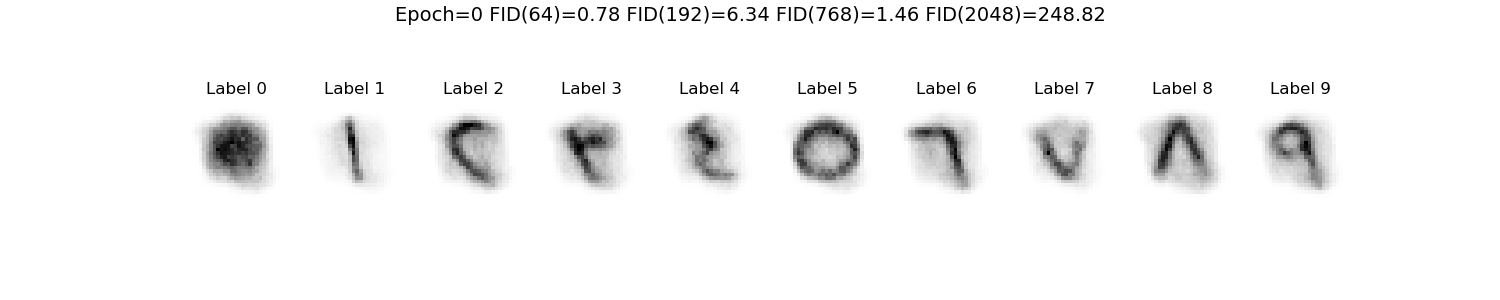

In [2]:
from IPython.display import Image

# set the path to the GIF file
path_to_gif = "/home/siu853655961/image_generation/cvae/figs/animation.gif"

# create an Image object with the GIF file
gif_image = Image(filename=path_to_gif, format="gif")

# display the GIF in the Jupyter notebook
display(gif_image)


VAE Loss Function


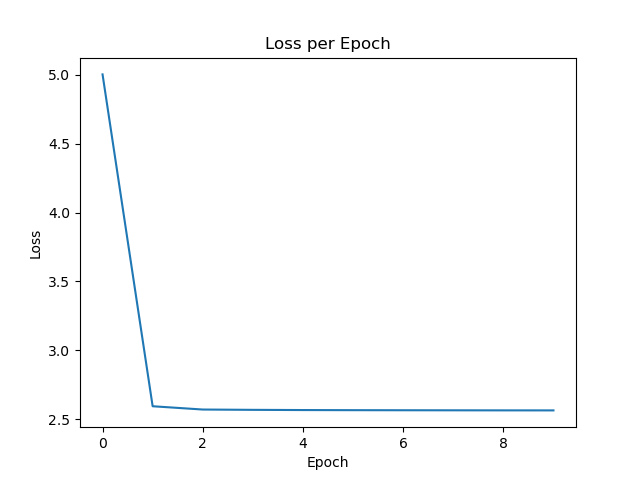

In [3]:
from IPython.display import Image, display
path = "/home/siu853655961/image_generation/cvae/loss_plot.png"
img = Image(filename=path, width=500, height=300)
print('VAE Loss Function')
display(img)

### Generative Adversarial Networks

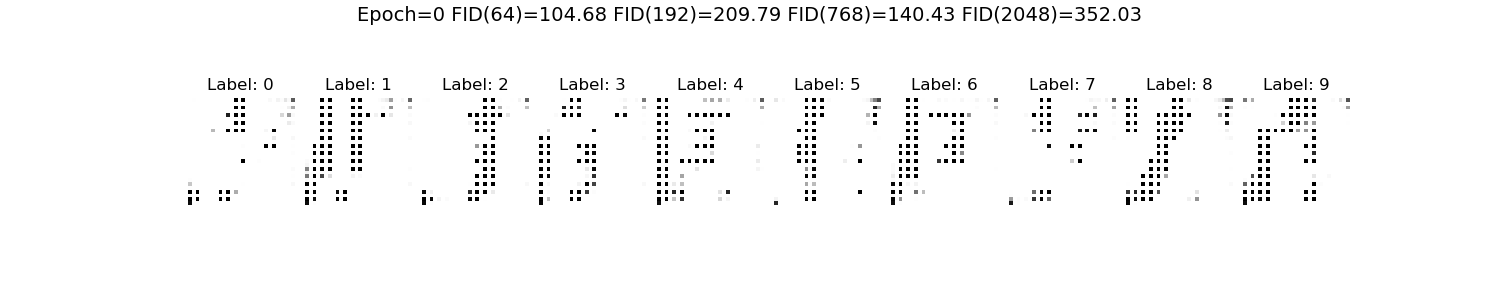

In [4]:
from IPython.display import Image

# set the path to the GIF file
path_to_gif = "/home/siu853655961/image_generation/acgan/figs/animation.gif"

# create an Image object with the GIF file
gif_image = Image(filename=path_to_gif, format="gif")

# display the GIF in the Jupyter notebook
display(gif_image)

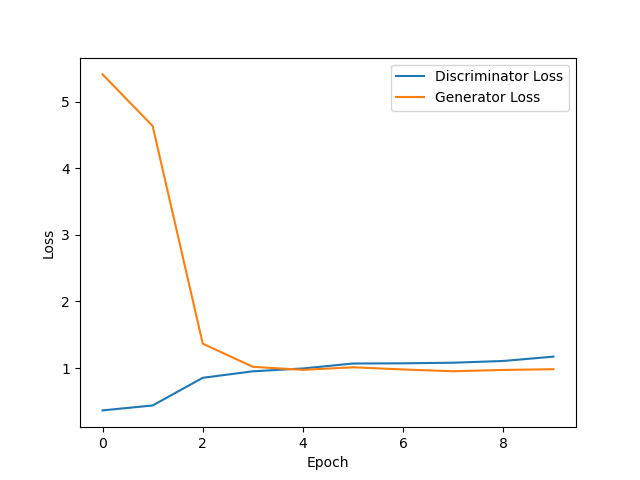

In [5]:
from IPython.display import Image, display
path = "/home/siu853655961/image_generation/acgan/loss_plot.png"
img = Image(filename=path, width=500, height=300)
display(img)

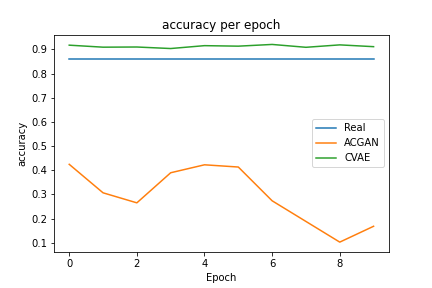

In [6]:
from IPython.display import Image, display
path = "/home/siu853655961/image_generation/output/accuracy.png"
img = Image(filename=path, width=500, height=300)
display(img)

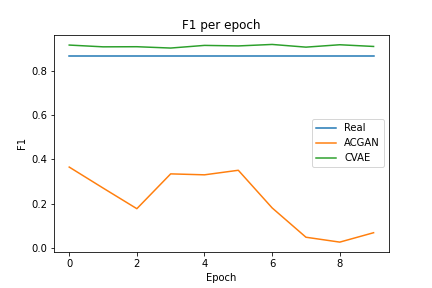

In [7]:
from IPython.display import Image, display
path = "/home/siu853655961/image_generation/output/F1.png"
img = Image(filename=path, width=500, height=300)
display(img)

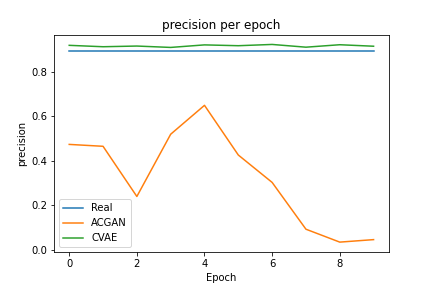

In [8]:
from IPython.display import Image, display
path = "/home/siu853655961/image_generation/output/precision.png"
img = Image(filename=path, width=500, height=300)
display(img)

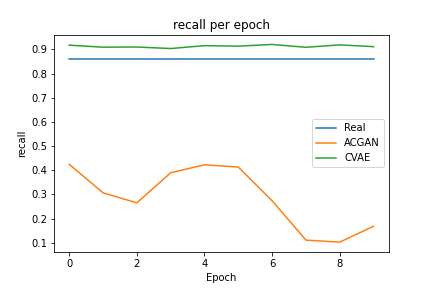

In [9]:
from IPython.display import Image, display
path = "/home/siu853655961/image_generation/output/recall.png"
img = Image(filename=path, width=500, height=300)
display(img)

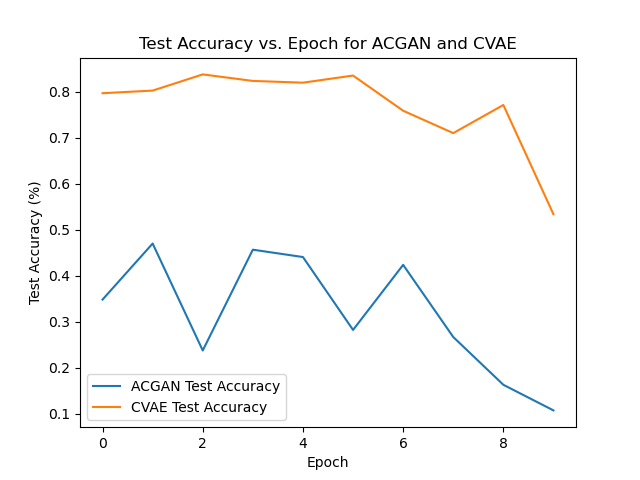

In [10]:
from IPython.display import Image, display
path = "/home/siu853655961/image_generation/output/test_accuracy_vs_epoch.png"
img = Image(filename=path, width=500, height=300)
display(img)

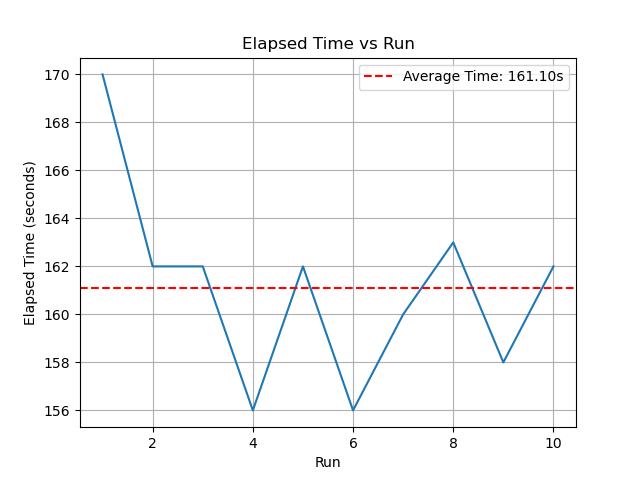

In [11]:
from IPython.display import Image, display
path = "/home/siu853655961/image_generation/cvae/elapsed_time_plot.png"
img = Image(filename=path, width=500, height=300)
display(img)

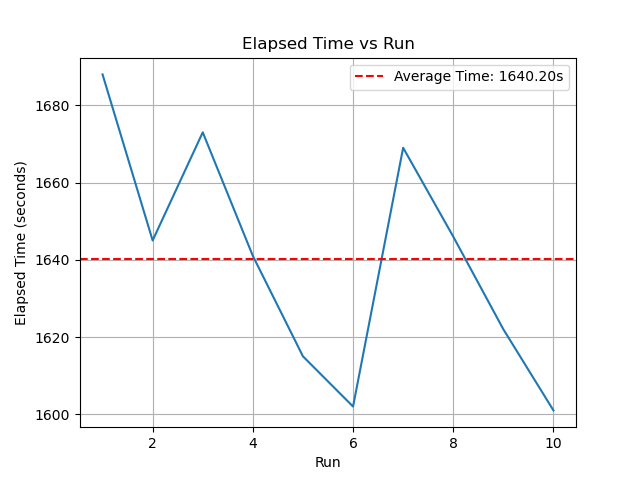

In [1]:
from IPython.display import Image, display
path = "/home/siu853655961/image_generation/acgan/elapsed_time_plot.png"
img = Image(filename=path, width=500, height=300)
display(img)

### Interpretation
The results suggest that the VAE and GAN models have different performance characteristics in generating Arabic Handwritten Digit images.

### VAE Model:
* The VAE model was able to generate realistic images after just one epoch of training. This indicates that VAEs are capable of learning the underlying data distribution relatively quickly, at least in this particular task.
* The generated images are blurry, which is a common issue with VAEs. However, these images still improve the Optical Character Recognition (OCR) performance. This could be because the VAE-generated images retain the essential features of the digits that are important for classification, despite the blurriness.

### GAN Model:
* The GAN model did not learn to generate realistic images even after 10 epochs of training. This might be due to the unstable and challenging training process associated with GANs, which often require careful hyperparameter tuning and architectural adjustments to achieve good results.
* The generated images are sharp, which is a characteristic of GANs. However, they do not help with OCR performance. This could be because the GAN-generated images might have missed important features required for accurate digit classification or the model experienced mode collapse, where the generator only generates a limited variety of samples that do not represent the full data distribution.

### Conclusion
In conclusion, while VAEs can quickly learn to generate realistic images and improve OCR performance, the generated images may be blurry. On the other hand, GANs can produce sharp images, but their training process is more challenging, and the generated images might not always help with OCR tasks.

### Gradient-weighted Class Activation Mapping (Grad-CAM) 
* Grad-CAM is a technique for generating a visual explanation of the decision made by a convolutional neural network (CNN) in image classification tasks. 

* To interpret the output maps generated by saliency map techniques like Grad-CAM, one should look for regions of the input image that are highlighted in the heatmap, as these correspond to the parts of the image that the model considered most important for its decision. 

* Hotter colors on the heatmap represent higher importance, while cooler colors represent lower importance. However, saliency maps should be interpreted with caution as they are not always reliable indicators of how a model is making its predictions, and they only show which parts of the image are important for the model's decision, but not why or how they are being used. Therefore, they should be used in conjunction with other methods of model interpretation and validation.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
model_type = 'cvae'

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

for row_idx, epoch in enumerate(range(10)):
    for col_idx, j in enumerate(range(10)):
        file_path = f"./saliency_maps_{model_type}/epoch_{epoch}/saliency_map_{j}.png"
        img = plt.imread(file_path)
        img = np.rot90(img, k=3)
        img = np.fliplr(img)
        axs[row_idx, col_idx].imshow(img)
        axs[row_idx, col_idx].axis('off')
        axs[row_idx, col_idx].set_title(f"Digit: {j}")

    axs[row_idx, 0].text(-0.2, 0.5, f"Epoch: {epoch}", transform=axs[row_idx, 0].transAxes,
                          rotation=90, va='center', ha='center')

plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.show()
plt.savefig('./saliency_maps')